In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

In [5]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=11)]
max_depth = [int(x) for x in np.linspace(3,10,num=8)]

In [2]:
cols = ["M01AB","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['M01AB'],axis=1)
target = data['M01AB']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [3]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)

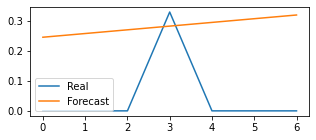

In [4]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [5]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.2637195161001744


In [11]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
parameters = model.best_params_

In [9]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=10)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

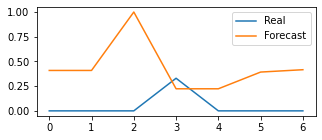

In [10]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [15]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.4961390253644079


In [20]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
parameters = model.best_params_

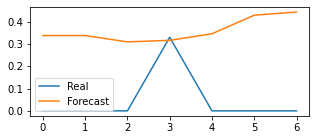

In [17]:
rf = RandomForestRegressor(random_state = 1,max_depth = 10,n_estimators = 12)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [18]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.3431838287125104


In [21]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 12}

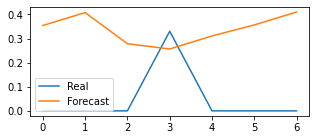

In [22]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 10,colsample_bytree= 0.5,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [23]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.3307352000051759


## M01AE 

In [30]:
cols = ["M01AE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['M01AE'],axis=1)
target = data['M01AE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [31]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)

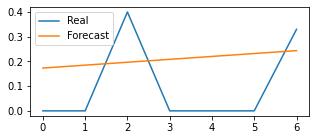

In [32]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [33]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.19226724667823916


In [41]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 7}

In [42]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=7)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

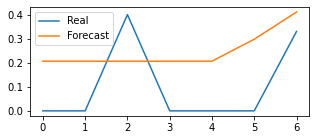

In [43]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [44]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.2081001849890911


In [45]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10, 'n_estimators': 8}

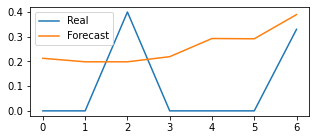

In [46]:
rf = RandomForestRegressor(random_state = 1,max_depth = 10,n_estimators = 8)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [47]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.2228612770593939


In [48]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 12}

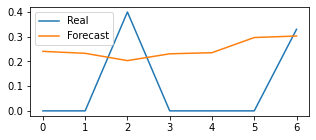

In [49]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 10,colsample_bytree= 0.5,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [50]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.22308736155854592


## N02BA

In [71]:
cols = ["N02BA","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N02BA'],axis=1)
target = data['N02BA']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

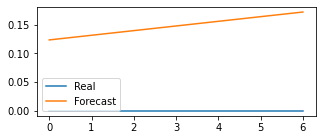

In [72]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [73]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.14872993419486805


In [74]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10}

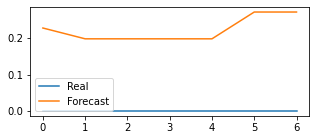

In [75]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=10)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [76]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.22590168418163104


In [77]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9, 'n_estimators': 8}

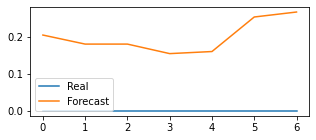

In [78]:
rf = RandomForestRegressor(random_state = 1,max_depth = 9,n_estimators = 8)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [79]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.20516869148282174


In [80]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=5)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 15}

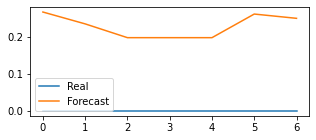

In [81]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [82]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.23172852583851422


## N02BE

In [83]:
cols = ["N02BE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N02BE'],axis=1)
target = data['N02BE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

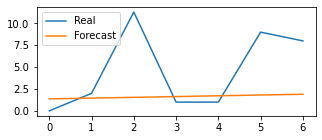

In [84]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [85]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

5.17041210965243


In [86]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9}

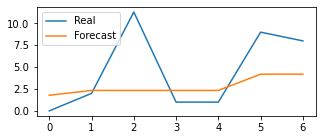

In [87]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=9)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [88]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.222605087251177


In [89]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9, 'n_estimators': 10}

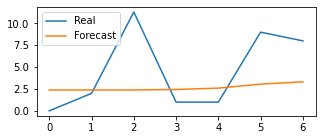

In [90]:
rf = RandomForestRegressor(random_state = 1,max_depth = 9,n_estimators = 10)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [91]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.5852997790773475


In [92]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=5)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 9,
 'n_estimators': 15}

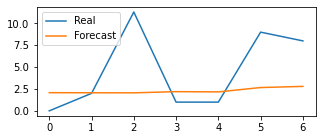

In [93]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 9,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [94]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.77596181052664


## N05B

In [2]:
cols = ["N05B","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)

In [3]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05B'],axis=1)
target = data['N05B']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

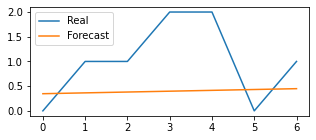

In [97]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [98]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.9619198461313333


In [99]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9}

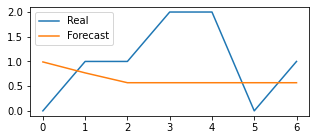

In [100]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=9)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [101]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.9119410525690811


In [102]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9, 'n_estimators': 15}

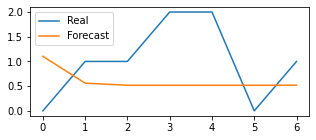

In [103]:
rf = RandomForestRegressor(random_state = 1,max_depth = 9,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [104]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.9662912590166928


In [6]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 8,
 'n_estimators': 14}

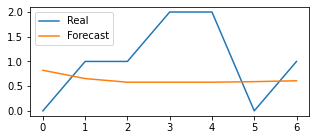

In [7]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 14,max_depth = 8,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [8]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.8872853224324055


## N05C

In [9]:
cols = ["N05C","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05C'],axis=1)
target = data['N05C']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

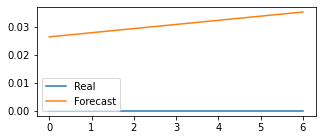

In [10]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [11]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.031065435962464978


In [12]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5}

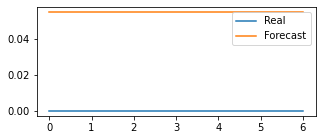

In [13]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [14]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.0547069825436409


In [15]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4, 'n_estimators': 5}

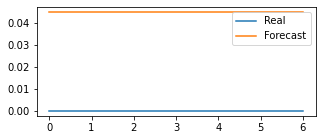

In [16]:
rf = RandomForestRegressor(random_state = 1,max_depth = 4,n_estimators = 5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [17]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.0450314968341385


In [18]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 15}

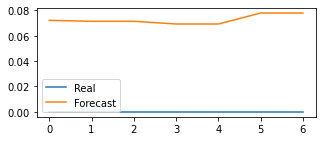

In [19]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 5,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [20]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.0728549400909835


## R03

In [21]:
cols = ["R03","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['R03'],axis=1)
target = data['R03']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

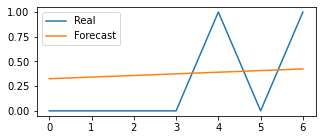

In [22]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [23]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.44068425026674934


In [24]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10}

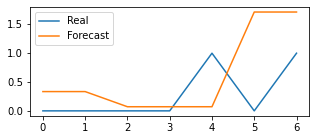

In [25]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=10)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [26]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.8057791176899255


In [27]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 6, 'n_estimators': 5}

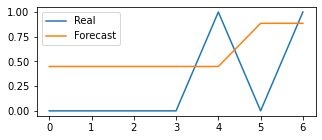

In [28]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 5)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [29]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.5220239907625197


In [30]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 15}

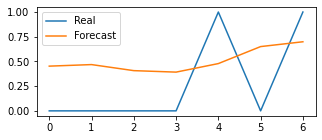

In [31]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth =6,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [32]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.46730909226672107


## R06

In [33]:
cols = ["R06","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/saleshourly.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['R06'],axis=1)
target = data['R06']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

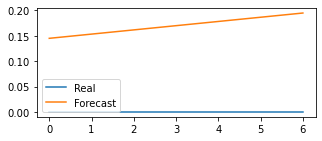

In [34]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [35]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.17086429160430658


In [36]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 9}

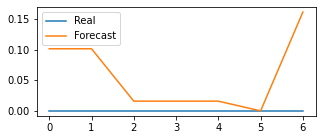

In [37]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=9)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [38]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.0824396248101546


In [39]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10, 'n_estimators': 6}

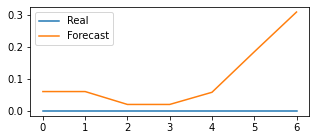

In [40]:
rf = RandomForestRegressor(random_state = 1,max_depth = 10,n_estimators = 6)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [41]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.14243412057894922


In [42]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 15}

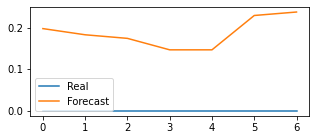

In [43]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 7,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [44]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

0.19111649577767845
